In [1]:
include("../../../julia/FNC_init.jl")

  Activating project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-methodlines-heatBE)

Now we apply backward Euler to the heat equation. We will reuse the setup from {numref}`Demo {number} <demo-methodlines-heatFE>`. Since the matrix in {eq}`BExx` never changes during the time stepping, we do the necessary LU factorization only once.

In [2]:
using SparseArrays
m = 100
x, Dx, Dxx = FNC.diffper(m, [0, 1]);
tfinal = 0.15 
n = 2400           # number of time steps
τ = tfinal / n     # time step    
t = τ * (0:n)      # time valuesusing SparseArrays
U = zeros(m, n+1);
U[:, 1] = @. exp( -60 * (x - 0.5)^2 )

B = sparse(I - τ * Dxx)
factor = lu(B)
for j in 1:n
    U[:, j+1] = factor \ U[:, j]
end

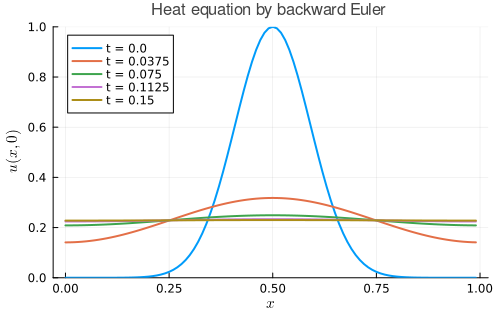

In [3]:
idx = 1:600:n+1
times = round.(t[idx], digits=4)
label = reshape(["t = $t" for t in times], 1, length(idx))
plot(x,U[:, idx];
    label, legend=:topleft,
    title="Heat equation by backward Euler",
    xaxis=(L"x"),  yaxis=(L"u(x,0)", [0, 1]))

In [4]:
anim = @animate for j in 1:20:n+1
    plot(x, U[:, j];
    label=@sprintf("t=%.5f", t[j]),
    xaxis=(L"x"),  yaxis=(L"u(x,t)", [0, 1]),
    dpi=150,  title="Heat equation by backward Euler")
end
mp4(anim, "diffusionBE.mp4")

┌ Info: Saved animation to /Users/driscoll/Dropbox/Mac/Documents/GitHub/fnc-notebooks/chapter11/section2/julia/diffusionBE.mp4
└ @ Plots /Users/driscoll/.julia/packages/Plots/FFuQi/src/animation.jl:156


Plots.AnimatedGif("/Users/driscoll/Dropbox/Mac/Documents/GitHub/fnc-notebooks/chapter11/section2/julia/diffusionBE.mp4")

This solution looks physically plausible, as the large concentration in the center diffuses outward until the solution is essentially constant. Observe that the solution remains periodic in space for all time.